# Oppgave a, 1 og 2 er nederst i filen

Eigenvalues of Hessian Matrix:[0.34050475 4.44509054]
[[3.96034809]
 [2.85070197]]
(2, 1) (100, 2) (100, 1)
[[3.96034809]
 [2.85070197]]


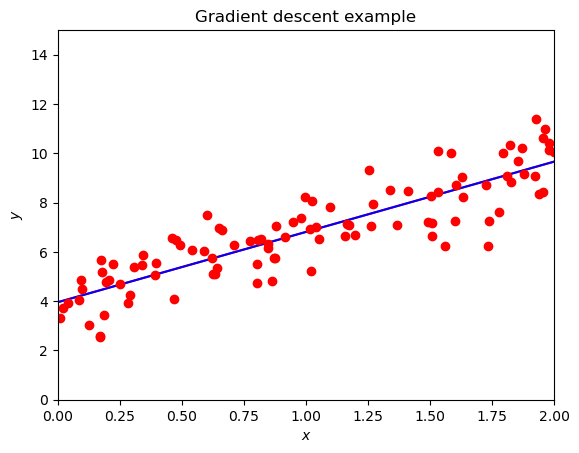

In [1]:
# Importing various packages
from random import random, seed
import autograd.numpy as np
from autograd import grad
# To do elementwise differentiation:
from autograd import elementwise_grad as egrad 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys

# the number of datapoints
n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
# Hessian matrix
H = (2.0/n)* X.T @ X
# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

beta_linreg = np.linalg.inv(X.T @ X) @ X.T @ y
print(beta_linreg)
beta = np.random.randn(2,1)

eta = 1.0/np.max(EigValues)
Niterations = 1000

for iter in range(Niterations):
    gradient = (2.0/n)*X.T @ (X @ beta-y)
    beta -= eta*gradient
print(np.shape(gradient), np.shape(X), np.shape(y))
print(beta)
xnew = np.array([[0],[2]])
xbnew = np.c_[np.ones((2,1)), xnew]
ypredict = xbnew.dot(beta)
ypredict2 = xbnew.dot(beta_linreg)
plt.plot(xnew, ypredict, "r-")
plt.plot(xnew, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Gradient descent example')
plt.show()

In [2]:
seed = np.random.seed(12345)

n = 100
x = np.random.rand(n,1)

def create_X(x):
    return np.c_[np.ones((n, 1)), x, x**2]

def create_data(x):
    return 1 + 3*x + 5*x**2 #+ np.random.randn(n, 1)

def cost_func(beta):
    return (1.0/n)*np.sum((y - X @ beta)**2)

y = create_data(x)

X = create_X(x)

beta = np.random.rand(3, 1)

def g(X, beta, y):
    return 2*X.T @ (X @ beta - y)

n_iter = 1000

#learning rate
eta = 0.001

#print(np.shape(X), np.shape(beta), np.shape(y))
for i in range(n_iter):
    beta -= eta*g(X, beta, y)
    
print(beta)

beta_linreg = np.linalg.inv(X.T @ X) @ X.T @ y

print(beta_linreg)

[[0.90320564]
 [3.49897584]
 [4.53447395]]
[[1.]
 [3.]
 [5.]]


In [3]:
def gradient_decent(X, y, beta, eta, derivative, n_iter, momentum=0):
    change = 0
    for i in range(n_iter):
        new_change = eta*derivative(beta) + momentum*change
        beta -= new_change
        change = new_change
        
    return beta

NameError: name 'XT_X' is not defined

In [5]:

beta = np.random.rand(3, 1)
for i in range(n_iter):
    beta -= eta*g_grad(beta)
print(beta)

beta_linreg = np.linalg.inv(X.T @ X) @ X.T @ y

print(beta_linreg)

[[2.46287796]
 [2.23442611]
 [2.27105315]]
[[1.]
 [3.]
 [5.]]


>0 f([0.74724774]) = 0.55838
>1 f([0.54175461]) = 0.29350
>2 f([0.37175575]) = 0.13820
>3 f([0.24640494]) = 0.06072
>4 f([0.15951871]) = 0.02545
>5 f([0.1015491]) = 0.01031
>6 f([0.0638484]) = 0.00408
>7 f([0.03976851]) = 0.00158
>8 f([0.02459084]) = 0.00060
>9 f([0.01511937]) = 0.00023
>10 f([0.00925406]) = 0.00009
>11 f([0.00564365]) = 0.00003
>12 f([0.0034318]) = 0.00001
>13 f([0.00208188]) = 0.00000
>14 f([0.00126053]) = 0.00000
>15 f([0.00076202]) = 0.00000
>16 f([0.00046006]) = 0.00000
>17 f([0.00027746]) = 0.00000
>18 f([0.00016719]) = 0.00000
>19 f([0.00010067]) = 0.00000
>20 f([6.05804744e-05]) = 0.00000
>21 f([3.64373635e-05]) = 0.00000
>22 f([2.19069576e-05]) = 0.00000
>23 f([1.31664443e-05]) = 0.00000
>24 f([7.91100141e-06]) = 0.00000
>25 f([4.75216828e-06]) = 0.00000
>26 f([2.85408468e-06]) = 0.00000
>27 f([1.71384267e-06]) = 0.00000
>28 f([1.02900153e-06]) = 0.00000
>29 f([6.17748881e-07]) = 0.00000


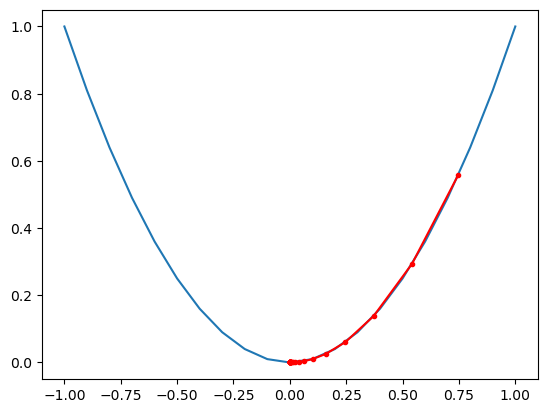

In [6]:
from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot
 
# objective function
def objective(x):
	return x**2.0
 
# derivative of objective function
def derivative(x):
	return x * 2.0
 
# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum):
	# track all solutions
	solutions, scores = list(), list()
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# keep track of the change
	change = 0.0
	# run the gradient descent
	for i in range(n_iter):
		# calculate gradient
		gradient = derivative(solution)
		# calculate update
		new_change = step_size * gradient + momentum * change
		# take a step
		solution = solution - new_change
		# save the change
		change = new_change
		# evaluate candidate point
		solution_eval = objective(solution)
		# store solution
		solutions.append(solution)
		scores.append(solution_eval)
		# report progress
		print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solutions, scores]
 
# seed the pseudo random number generator
seed(4)
# define range for input
bounds = asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# define momentum
momentum = 0.3
# perform the gradient descent search with momentum
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

>0 f([0.74724774]) = 0.55838
>1 f([0.59779819]) = 0.35736
>2 f([0.47823856]) = 0.22871
>3 f([0.38259084]) = 0.14638
>4 f([0.30607268]) = 0.09368
>5 f([0.24485814]) = 0.05996
>6 f([0.19588651]) = 0.03837
>7 f([0.15670921]) = 0.02456
>8 f([0.12536737]) = 0.01572
>9 f([0.10029389]) = 0.01006
>10 f([0.08023512]) = 0.00644
>11 f([0.06418809]) = 0.00412
>12 f([0.05135047]) = 0.00264
>13 f([0.04108038]) = 0.00169
>14 f([0.0328643]) = 0.00108
>15 f([0.02629144]) = 0.00069
>16 f([0.02103315]) = 0.00044
>17 f([0.01682652]) = 0.00028
>18 f([0.01346122]) = 0.00018
>19 f([0.01076897]) = 0.00012
>20 f([0.00861518]) = 0.00007
>21 f([0.00689214]) = 0.00005
>22 f([0.00551372]) = 0.00003
>23 f([0.00441097]) = 0.00002
>24 f([0.00352878]) = 0.00001
>25 f([0.00282302]) = 0.00001
>26 f([0.00225842]) = 0.00001
>27 f([0.00180673]) = 0.00000
>28 f([0.00144539]) = 0.00000
>29 f([0.00115631]) = 0.00000


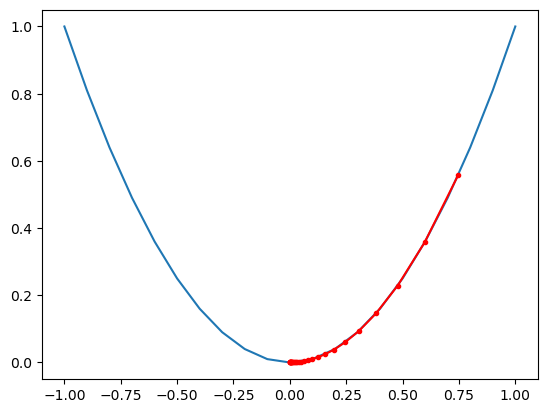

In [7]:
from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot
 
# objective function
def objective(x):
	return x**2.0
 
# derivative of objective function
def derivative(x):
	return x * 2.0
 
# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size):
	# track all solutions
	solutions, scores = list(), list()
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# run the gradient descent
	for i in range(n_iter):
		# calculate gradient
		gradient = derivative(solution)
		# take a step
		solution = solution - step_size * gradient
		# evaluate candidate point
		solution_eval = objective(solution)
		# store solution
		solutions.append(solution)
		scores.append(solution_eval)
		# report progress
		print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solutions, scores]
 
# seed the pseudo random number generator
seed(4)
# define range for input
bounds = asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# perform the gradient descent search
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

In [8]:
x = np.random.rand(n,1)
y = create_data(x)

X = create_X(x)
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)
# Hessian matrix
H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

theta = np.random.randn(3,1)
eta = 1.0/np.max(EigValues)
Niterations = 100

# define the gradient
training_gradient = grad(cost_func)

for iter in range(Niterations*10):
    gradients = training_gradient(theta)
    theta -= eta*gradients
    #print(iter,gradients[0],gradients[1])
print("theta from own gd")
print(theta)

theta = np.random.randn(3,1)
# Now improve with momentum gradient descent
change = 0.0
delta_momentum = 0.9
for iter in range(Niterations*10):
    # calculate gradient
    gradients = training_gradient(theta)
    # calculate update
    new_change = eta*gradients+delta_momentum*change
    # take a step
    theta -= new_change
    # save the change
    change = new_change
    #print(iter,gradients[0],gradients[1])
print("theta from own gd wth momentum")
print(theta)

Own inversion
[[1.]
 [3.]
 [5.]]
Eigenvalues of Hessian Matrix:[2.83705967 0.21664226 0.00512639]
theta from own gd
[[0.98056432]
 [3.10074066]
 [4.9040234 ]]
theta from own gd wth momentum
[[1.]
 [3.]
 [5.]]


In [9]:
from random import random, seed
import autograd.numpy as np
from autograd import grad
# To do elementwise differentiation:
from autograd import elementwise_grad as egrad 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys

In [10]:
def create_X(x):
    return np.c_[np.ones((n, 1)), x, x**2]

def create_data(x):
    return 1 + 3*x + 5*x**2 #+ np.random.randn(n, 1)

def cost_func(beta):
    return (1.0/n)*np.sum((y - X @ beta)**2)

In [11]:
seed = np.random.seed(12345)

n = 100
x = np.random.rand(n,1)
y = create_data(x)

X = create_X(x)

beta = np.random.rand(3, 1)

In [12]:
def gradient_decent(X, y, beta, eta, derivative, n_iter, momentum=0):
    change = 0
    for i in range(n_iter):
        new_change = eta*derivative(beta) + momentum*change
        beta -= new_change
        change = new_change
        
    return beta

g_grad = egrad(cost_func)

### Uten momentum

In [13]:
H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

eta = 1.0/np.max(EigValues)
print(eta)
#eta = 0.001
n_iter = 1000
beta = np.random.rand(3, 1)
beta = gradient_decent(X, y, beta, eta, g_grad, n_iter)
print(beta)

beta_linreg = np.linalg.inv(X.T @ X) @ X.T @ y

print(beta_linreg)

Eigenvalues of Hessian Matrix:[2.83705967 0.21664226 0.00512639]
0.35247760575951176
[[0.97133235]
 [3.147782  ]
 [4.86212484]]
[[1.]
 [3.]
 [5.]]


### Med momentum

In [14]:
n_iter = 1000

H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

eta = 1.0/np.max(EigValues)
beta = np.random.rand(3, 1)
beta = gradient_decent(X, y, beta, eta, g_grad, n_iter, momentum=0.9)
print(beta)

beta_linreg = np.linalg.inv(X.T @ X) @ X.T @ y

print(beta_linreg)

Eigenvalues of Hessian Matrix:[2.83705967 0.21664226 0.00512639]
[[1.]
 [3.]
 [5.]]
[[1.]
 [3.]
 [5.]]


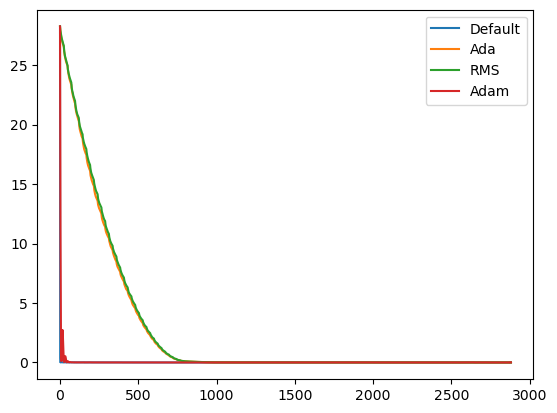

[[2.0653381 ]
 [2.9827109 ]
 [3.99394028]]
[[1.97184568]
 [3.55474482]
 [3.42968346]]
[[1.97082206]
 [3.50224317]
 [3.48113687]]
[[1.99947872]
 [2.9484892 ]
 [4.02833895]]


'\nplt.plot(x,y,".")\nplt.plot(x, y_pred_grad, ".")\nplt.plot(x, y_pred_grad_ada, ".")\nplt.show()\n'

In [15]:
from sklearn.linear_model import LinearRegression as OLS_reg
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from autograd import grad
import numpy as np
import matplotlib.pyplot as plt


def CostOLS(y, X, beta):
    return (1/y.shape[0])*((y- X@beta).T)@(y- X@beta)

def CostRidge(y, X, beta, lambda_):
    return (1/y.shape[0])*((y- X@beta).T)@(y- X@beta) + lambda_*beta.T@beta

#Define the gradient with costfunction
gradient = grad(CostOLS, 2) #2 meaning beta

def gradient_decent(X, y, beta, lr, n_iter, momentum=0, batch_size=1, useAda=False, useRMS=False, useAdam=False, lambda_ = 0):
    MSE_list = [] #Store MSE scores every update to plot
    beta_list = [] #Store every time beta is updated
    change = 0
    m = int(n_iter/M) #number of minibatches
    y_pred = beta[0] + beta[1]*x + beta[2]*x*x
    MSE_list.append(mse(y, y_pred))
    beta_list.append(beta)
    if useAda:
        delta = 1e-8
        eta = 0.01
        for i in range(n_iter):
            Giter = np.zeros(shape=(3,3))
            for i in range(m):
                #Split up X and y
                rand_ind = M*np.random.randint(m)
                xi = X[rand_ind:rand_ind+M]
                yi = y[rand_ind:rand_ind+M]
                gradients = gradient(yi, xi, beta)

                # Calculate the outer product of the gradients
                Giter +=gradients @ gradients.T
                # Simpler algorithm with only diagonal elements
                Ginverse = np.c_[eta/(delta+np.sqrt(np.diagonal(Giter)))]
                # compute update
                update = np.multiply(Ginverse,gradients)

                new_change = update + momentum*change
                beta -= new_change
                change = new_change
                y_pred = beta[0] + beta[1]*x + beta[2]*x*x
                MSE_list.append(mse(y, y_pred))
                beta_list.append(beta)
                #Calculate MSE and store to list and plot.
                # momentum vs non-momentum
    elif useRMS:
        rho = 0.99
        eta = 0.01
        delta = 1e-8
        for i in range(n_iter):
            Giter = np.zeros(shape=(3,3))
            for i in range(m):
                #Split up X and y
                rand_ind = M*np.random.randint(m)
                xi = X[rand_ind:rand_ind+M]
                yi = y[rand_ind:rand_ind+M]
                gradients = gradient(yi, xi, beta)

                # Previous value for the outer product of gradients
                Previous = Giter
        	    # Accumulated gradient
                Giter +=gradients @ gradients.T
        	    # Scaling with rho the new and the previous results
                Gnew = (rho*Previous+(1-rho)*Giter)
        	    # Taking the diagonal only and inverting
                Ginverse = np.c_[eta/(delta+np.sqrt(np.diagonal(Gnew)))]
        	    # Hadamard product
                update = np.multiply(Ginverse,gradients)

                new_change = update + momentum*change
                beta -= new_change
                change = new_change
                y_pred = beta[0] + beta[1]*x + beta[2]*x*x
                MSE_list.append(mse(y, y_pred))
                beta_list.append(beta)

    elif useAdam:
        b1 = 0.9
        b2 = 0.999
        t = 0
        eps = 1e-8
        m_ = 0
        v = 0
        for i in range(n_iter):
            for i in range(m):
                rand_ind = M*np.random.randint(m)
                xi = X[rand_ind:rand_ind+M]
                yi = y[rand_ind:rand_ind+M]

                t = t + 1
                gradients = gradient(yi, xi, beta)
                m_ = b1*m_ + (1-b1)*gradients
                v = b2*v + (1-b2)*gradients**2
                m_hat = m_/(1-b1**t)
                v_hat = v/(1-b2**t)
                update = lr*m_hat/(np.sqrt(v_hat)+eps)

                new_change = update + momentum*change
                beta -= new_change
                change = new_change
                y_pred = beta[0] + beta[1]*x + beta[2]*x*x
                MSE_list.append(mse(y, y_pred))
                beta_list.append(beta)

    else:
        for i in range(n_iter):
            for i in range(m):
                #Split up X and y
                rand_ind = M*np.random.randint(m)
                xi = X[rand_ind:rand_ind+M]
                yi = y[rand_ind:rand_ind+M]
                new_change = lr*gradient(yi, xi, beta) + momentum*change
                beta -= new_change
                change = new_change
                y_pred = beta[0] + beta[1]*x + beta[2]*x*x
                MSE_list.append(mse(y, y_pred))
                beta_list.append(beta)
                #Calculate MSE and store to list and plot.
                # momentum vs non-momentum
    #plt.plot(MSE_list)
    #plt.show()
    return beta, MSE_list, beta_list

n = 10000
x = np.random.rand(n,1)
#Analytical value. Static learning rate.
y = 2+3*x+4*x*x+0.1*np.random.rand(n,1)


X = np.c_[np.ones((n,1)), x, x**2] #design matrix
XT_X = X.T @ X
#theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)
lr = 1.0/np.max(EigValues)

#X_train, X_test, y_train, y_test = train_test_split(X,z, test_size=0.2)
#Simple OLS fit
model = OLS_reg(fit_intercept=True)
model.fit(X, y)
y_pred = model.intercept_ + model.coef_[0][1]*x + model.coef_[0][2]*x*x

np.random.seed(200)
beta = np.random.randn(3,1)
np.random.seed(200)
beta_ada = np.random.randn(3,1)
np.random.seed(200)
beta_rms = np.random.randn(3,1)
np.random.seed(200)
beta_adam = np.random.randn(3,1)

#lr = 0.01
n_epochs = 120
M = 5   #size of each minibatch
beta, MSE_list, _ = gradient_decent(X, y, beta, lr, n_epochs, batch_size=M)
beta_ada, MSE_list_ada, _ = gradient_decent(X, y, beta_ada, lr, n_epochs, batch_size=M, useAda=True)
beta_rms, MSE_list_rms, _ = gradient_decent(X, y, beta_rms, lr, n_epochs, batch_size=M, useRMS=True)
beta_adam, MSE_list_adam, _ = gradient_decent(X, y, beta_adam, lr, n_epochs, batch_size=M, useAdam=True)
plt.plot(MSE_list, label="Default")
plt.plot(MSE_list_ada, label="Ada")
plt.plot(MSE_list_rms, label="RMS")
plt.plot(MSE_list_adam, label="Adam")
plt.legend()
plt.show()


"""
plt.plot(beta, label="Default")
plt.plot(beta_ada, label="Ada")
plt.plot(beta_rms, label="RMS")
plt.legend()
"""



print(beta)
print(beta_ada)
print(beta_rms)
print(beta_adam)
y_pred_grad = beta[0] + beta[1]*x + beta[2]*x*x
y_pred_grad_ada = beta_ada[0] + beta_ada[1]*x + beta_ada[2]*x*x
y_pred_grad_rms = beta_rms[0] + beta_rms[1]*x + beta_rms[2]*x*x

"""
plt.plot(x,y,".")
plt.plot(x, y_pred_grad, ".")
plt.plot(x, y_pred_grad_ada, ".")
plt.show()
"""

#NOTES:
# Opg a) juster hyperparametere slik at vi klart ser forskjell på performance.
# Prøv ulike learning rates, statisk.
# Adam : https://arxiv.org/abs/1412.6980
#Følg morten eks for nettverket.

#Lag nettverketet generalisert, e.g custom ant noder og lag.
#logistisk regresjon = nettverk med bare et output lag.


# Part b

In [16]:
class NeuralNetwork:
    def __init__(
            self,
            X_data,
            Y_data,
            n_hidden_neurons=50,
            n_categories=10,
            epochs=10,
            batch_size=100,
            eta=0.1,
            lmbd=0.0):

        self.X_data_full = X_data
        self.Y_data_full = Y_data

        self.n_inputs = X_data.shape[0]
        self.n_features = X_data.shape[1]
        self.n_hidden_neurons = n_hidden_neurons
        self.n_categories = n_categories

        self.epochs = epochs
        self.batch_size = batch_size
        self.iterations = self.n_inputs // self.batch_size
        self.eta = eta
        self.lmbd = lmbd

        self.create_biases_and_weights()

    def create_biases_and_weights(self):
        self.hidden_weights = np.random.randn(self.n_features, self.n_hidden_neurons)
        self.hidden_bias = np.zeros(self.n_hidden_neurons) + 0.01

        self.output_weights = np.random.randn(self.n_hidden_neurons, self.n_categories)
        self.output_bias = np.zeros(self.n_categories) + 0.01

    def feed_forward(self):
        # feed-forward for training
        self.z_h = np.matmul(self.X_data, self.hidden_weights) + self.hidden_bias
        self.a_h = sigmoid(self.z_h)

        self.z_o = np.matmul(self.a_h, self.output_weights) + self.output_bias

        exp_term = np.exp(self.z_o)
        self.probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)

    def feed_forward_out(self, X):
        # feed-forward for output
        z_h = np.matmul(X, self.hidden_weights) + self.hidden_bias
        a_h = sigmoid(z_h)

        z_o = np.matmul(a_h, self.output_weights) + self.output_bias
        
        exp_term = np.exp(z_o)
        probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)
        return probabilities

    def backpropagation(self):
        error_output = self.probabilities - self.Y_data
        error_hidden = np.matmul(error_output, self.output_weights.T) * self.a_h * (1 - self.a_h)

        self.output_weights_gradient = np.matmul(self.a_h.T, error_output)
        self.output_bias_gradient = np.sum(error_output, axis=0)

        self.hidden_weights_gradient = np.matmul(self.X_data.T, error_hidden)
        self.hidden_bias_gradient = np.sum(error_hidden, axis=0)

        if self.lmbd > 0.0:
            self.output_weights_gradient += self.lmbd * self.output_weights
            self.hidden_weights_gradient += self.lmbd * self.hidden_weights

        self.output_weights -= self.eta * self.output_weights_gradient
        self.output_bias -= self.eta * self.output_bias_gradient
        self.hidden_weights -= self.eta * self.hidden_weights_gradient
        self.hidden_bias -= self.eta * self.hidden_bias_gradient

    def predict(self, X):
        probabilities = self.feed_forward_out(X)
        return np.argmax(probabilities, axis=1)

    def predict_probabilities(self, X):
        probabilities = self.feed_forward_out(X)
        return probabilities

    def train(self):
        data_indices = np.arange(self.n_inputs)

        for i in range(self.epochs):
            for j in range(self.iterations):
                # pick datapoints with replacement
                chosen_datapoints = np.random.choice(
                    data_indices, size=self.batch_size, replace=False
                )

                # minibatch training data
                self.X_data = self.X_data_full[chosen_datapoints]
                self.Y_data = self.Y_data_full[chosen_datapoints]

                self.feed_forward()
                self.backpropagation()

In [18]:
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4 + np.random.normal(0, 0.1, x.shape)

In [19]:
#Hentet fra forelesnings notater uke 35 under "More preprocessing examples, Franke function and regression"
def create_X(x, y, n):
    if len(x.shape) > 1:
        x = np.ravel(x) # flattens the matrices
        y = np.ravel(y)

    N = len(x) #number of x-variables, datapoints
    l = int((n+1)*(n+2)/2)     # Number of elements in beta - parameters, features
    X = np.ones((N,l)) #Making a matrix of dimentions given by the number of variables and number of parameters

    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k)

    return X

In [21]:
epochs = 100
batch_size = 100

dnn = NeuralNetwork(X_train, Y_train_onehot, eta=eta, lmbd=lmbd, epochs=epochs, batch_size=batch_size,
                    n_hidden_neurons=n_hidden_neurons, n_categories=n_categories)
dnn.train()
test_predict = dnn.predict(X_test)

# accuracy score from scikit library
print("Accuracy score on test set: ", accuracy_score(Y_test, test_predict))

# equivalent in numpy
def accuracy_score_numpy(Y_test, Y_pred):
    return np.sum(Y_test == Y_pred) / len(Y_test)


NameError: name 'X_train' is not defined